In [34]:
import torch
import torch.nn as nn
import timm

from torch.utils.data import DataLoader, Dataset
from torchvision import transforms, datasets
from torch import optim

from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score

import argparse
import random
import numpy as np
import os

from tqdm import tqdm
from glob import glob

import PIL.Image as Image

import cv2


In [35]:
from src_dppix import util as iu
from src_dppix import dp_pixel as dp
from src_dppix import dataset as db
from src_dppix.resize import Resize
from src_dppix.pixelate import Pixelate

In [36]:
class Dataset:
    def __init__(self):
        self.data_dir = ''
        self.scale = None
    
    def get_random_image():
        pass 
    
    def load_images(self, n=16):
        image_paths = set([self.get_random_image() for i in range(n)])
        images = list(map(pillow_to_numpy, map(Image.open, image_paths)))
        return images

class FacesDataset(Dataset):
    def __init__(self):
        self.data_dir = '/media/data1/donggeun/FF_original/FaceForensics++/DeepFake/test/fake/'
        self.scale = (32,32)
        
    def get_random_image(self):
        person = choose_random_path(self.data_dir)
        image = choose_random_path(person)
        return image
    

In [37]:
resize_f = Resize.pad_image
pixelate_f = Pixelate.pytorch

def pillow_to_numpy(I):
    img = np.asarray(I, dtype=np.float32)
    return img

def choose_random_path(path):
    files = os.listdir(path)
    file = random.choice(files)
    path = os.path.join(path, file)
    return path

def load(dataset, n = 1):
    images = dataset.load_images(n)
    iu.display_image_grid(images)
    return images

def dp_pixelate_images(images, target_h, target_w, m, eps):
    noisy_images = [dp.dp_pixelate(I,target_h, target_w, m, eps, resize_f=resize_f, 
                                   pixelate_f=pixelate_f) for I in images]
    iu.display_image_grid(noisy_images)
    
def vary_eps(images, target_h, target_w, m, start, end, step):
    I = random.choice(images)
    eps_vals = np.arange(start,end+step,step)
    noisy_images = [dp.dp_pixelate(I, target_h, target_w, m, eps, resize_f=resize_f,
                                  pixelate_f=pixelate_f) for eps in eps_vals]
    titles=["{:.1f}".format(eps) for eps in eps_vals]
    iu.display_image_grid(noisy_images, titles=titles)
    
def dp_pixelate_images_singleimg(images, target_h, target_w, m, eps):
    noisy_images = dp.dp_pixelate(images,target_h, target_w, m, eps, resize_f=resize_f, 
                                   pixelate_f=pixelate_f)
    
    return noisy_images
def pillow_to_numpy(I):
    img = np.asarray(I, dtype=np.float32)
    return img

### Convert deepfake images (& face-mask images) to DP face

In [29]:
masked_df_path = '/media/data1/donggeun/masked_test/FaceForensics++/DeepFake/'
orig_df_path = '/media/data1/donggeun/FF_original/FaceForensics++/DeepFake/test/'



In [30]:
target_h = 160
target_w = 160
m = 10
eps = 100

In [33]:
import os
df_imgdir = glob('/home/data/deepfake_privacy/FF_original/FaceForensics++/Face2Face/test/real/*/')
fake_img_dir = '/home/data/deepfake_privacy/FF_original/FaceForensics++/Face2Face/test/real/'
k = 7
epsilon = 0.01

print(len(df_imgdir))
for idx, folder in enumerate(df_imgdir):
    
    # extract the last part of the folder for joining path
    imgfolder = folder.split('/')[-2]
    if not os.path.exists('/home/data/deepfake_privacy/ff_priv/Face2Face/pixel/test/real/{0}'.format(imgfolder)):
        os.makedirs(os.path.join('/home/data/deepfake_privacy/ff_priv/Face2Face/pixel/test/real/', imgfolder))
    subfolder = os.path.join('/home/data/deepfake_privacy/ff_priv/Face2Face/pixel/test/real/', imgfolder)
    
    # subfolder = location of saved area
    # globfolder = location of train data
    globfolder = fake_img_dir + imgfolder + '/*'
    
    print(globfolder, 'glob folder')
#     print(subfolder)
    # generating pixelation image per every image of each subfolder
    for idx2, img in enumerate(glob(globfolder)):
        image = Image.open(img)
        a = pillow_to_numpy(image)
        dpimg = dp_pixelate_images_singleimg(a, target_h, target_w, m, eps)
        dpimg = dpimg.astype('uint8')
    
#         plt.imshow(dpimg)
        cv2.imwrite(subfolder+'/folder_{0}_pixel_test_{1}.jpg'.format(idx, idx2),cv2.cvtColor(dpimg, cv2.COLOR_RGB2BGR))
        if idx2 == 10:
            print(subfolder, 'sub folder')
            
print('######finished test!!##########')

##############################################################################################################################

125
/home/data/deepfake_privacy/FF_original/FaceForensics++/Face2Face/test/real/978/* glob folder
/home/data/deepfake_privacy/ff_priv/Face2Face/pixel/test/real/978 sub folder
/home/data/deepfake_privacy/FF_original/FaceForensics++/Face2Face/test/real/878/* glob folder
/home/data/deepfake_privacy/ff_priv/Face2Face/pixel/test/real/878 sub folder
/home/data/deepfake_privacy/FF_original/FaceForensics++/Face2Face/test/real/992/* glob folder
/home/data/deepfake_privacy/ff_priv/Face2Face/pixel/test/real/992 sub folder
/home/data/deepfake_privacy/FF_original/FaceForensics++/Face2Face/test/real/902/* glob folder
/home/data/deepfake_privacy/ff_priv/Face2Face/pixel/test/real/902 sub folder
/home/data/deepfake_privacy/FF_original/FaceForensics++/Face2Face/test/real/961/* glob folder
/home/data/deepfake_privacy/ff_priv/Face2Face/pixel/test/real/961 sub folder
/home/data/deepfake_privacy/FF_original/FaceForensics++/Face2Face/test/real/934/* glob folder
/home/data/deepfake_privacy/ff_priv/Face2Face/p

/home/data/deepfake_privacy/FF_original/FaceForensics++/Face2Face/test/real/950/* glob folder
/home/data/deepfake_privacy/ff_priv/Face2Face/pixel/test/real/950 sub folder
/home/data/deepfake_privacy/FF_original/FaceForensics++/Face2Face/test/real/910/* glob folder
/home/data/deepfake_privacy/ff_priv/Face2Face/pixel/test/real/910 sub folder
/home/data/deepfake_privacy/FF_original/FaceForensics++/Face2Face/test/real/933/* glob folder
/home/data/deepfake_privacy/ff_priv/Face2Face/pixel/test/real/933 sub folder
/home/data/deepfake_privacy/FF_original/FaceForensics++/Face2Face/test/real/986/* glob folder
/home/data/deepfake_privacy/ff_priv/Face2Face/pixel/test/real/986 sub folder
/home/data/deepfake_privacy/FF_original/FaceForensics++/Face2Face/test/real/907/* glob folder
/home/data/deepfake_privacy/ff_priv/Face2Face/pixel/test/real/907 sub folder
/home/data/deepfake_privacy/FF_original/FaceForensics++/Face2Face/test/real/895/* glob folder
/home/data/deepfake_privacy/ff_priv/Face2Face/pixel

/home/data/deepfake_privacy/FF_original/FaceForensics++/Face2Face/test/real/937/* glob folder
/home/data/deepfake_privacy/ff_priv/Face2Face/pixel/test/real/937 sub folder
/home/data/deepfake_privacy/FF_original/FaceForensics++/Face2Face/test/real/924/* glob folder
/home/data/deepfake_privacy/ff_priv/Face2Face/pixel/test/real/924 sub folder
/home/data/deepfake_privacy/FF_original/FaceForensics++/Face2Face/test/real/898/* glob folder
/home/data/deepfake_privacy/ff_priv/Face2Face/pixel/test/real/898 sub folder
/home/data/deepfake_privacy/FF_original/FaceForensics++/Face2Face/test/real/995/* glob folder
/home/data/deepfake_privacy/ff_priv/Face2Face/pixel/test/real/995 sub folder
/home/data/deepfake_privacy/FF_original/FaceForensics++/Face2Face/test/real/876/* glob folder
/home/data/deepfake_privacy/ff_priv/Face2Face/pixel/test/real/876 sub folder
/home/data/deepfake_privacy/FF_original/FaceForensics++/Face2Face/test/real/915/* glob folder
/home/data/deepfake_privacy/ff_priv/Face2Face/pixel

In [25]:
from PIL import Image
import cv2
import matplotlib.pyplot as plt
import matplotlib.cm as cm

def dp_pixelate_images_singleimg(images, target_h, target_w, m, eps):
    noisy_images = dp.dp_pixelate(images,target_h, target_w, m, eps, resize_f=resize_f, 
                                   pixelate_f=pixelate_f)
    
#     noisy_images = np.asarray(noisy_images, dtype=np.float32)
    return noisy_images
    
def pillow_to_numpy(I):
    img = np.asarray(I, dtype=np.float32)
    return img

orig_df_path = '/media/data1/donggeun/FF_original/FaceForensics++/DeepFake/test/fake/875_979'
# img = cv2.imread('/media/data1/donggeun/FF_original/FaceForensics++/DeepFake/test/fake/875_979/0000.png')
# m = 10
# eps_list = [50,100,200,300,400,500,600]
eps = 100
m_list = [1,5,10,15,20,25,30]
image = Image.open('/media/data1/donggeun/FF_original/FaceForensics++/DeepFake/test/fake/875_979/0000.png')

for i in m_list:
    a = pillow_to_numpy(image)
    dpimg = dp_pixelate_images_singleimg(a, target_h, target_w, i, eps)
    dpimg = dpimg.astype('uint8')
#     cv2.imwrite('./kaia_figure/pix_eps_{}.png'.format(i), cv2.cvtColor(dpimg,cv2.COLOR_RGB2BGR))
    cv2.imwrite('./kaia_figure/pix_m_{}.png'.format(i), cv2.cvtColor(dpimg,cv2.COLOR_RGB2BGR))

#     plt.axis('off')
#     dpimg.save('./kaia_figure/pix_eps_{}.png'.format(i))
# plt.imshow(dpimg)
# plt.show()


# plt.xticks([])
# plt.yticks([])
# plt.show()

# cv2.waitKey(0)
# cv2.destroyAllWindows()



In [27]:
target_h = 160
target_w = 160
m = 10
eps = 100

def dp_pixelate_images_singleimg(images, target_h, target_w, m, eps):
    noisy_images = dp.dp_pixelate(images,target_h, target_w, m, eps, resize_f=resize_f, 
                                   pixelate_f=pixelate_f)
    
#     noisy_images = np.asarray(noisy_images, dtype=np.float32)
    return noisy_images
    

### Apply differential privacy pixelate to deepfake test fake images

- target_h & w = 160 x 160
- m = 10 , eps = 100 

In [10]:
df_imgdir = glob('/media/data1/donggeun/FF_original/FaceForensics++/DeepFake/train/fake/*/')
pp = '/media/data1/donggeun/FF_original/FaceForensics++/DeepFake/train/fake/*/'
print(df_imgdir[0].split('/')[-2])
print(pp)
aa = pp + '*'
everyone = glob(aa)
print(glob(aa)[:2])

057_070
/media/data1/donggeun/FF_original/FaceForensics++/DeepFake/train/fake/*/
['/media/data1/donggeun/FF_original/FaceForensics++/DeepFake/train/fake/057_070/0091.png', '/media/data1/donggeun/FF_original/FaceForensics++/DeepFake/train/fake/057_070/0318.png']


### Apply DP-pixelate to DF train dataset (fake first, then real)

/media/data1/donggeun/FF_original/FaceForensics++/DeepFake/train/real/457/* glob folder
/home/data/privacy/pixel/real/457 sub folder
/media/data1/donggeun/FF_original/FaceForensics++/DeepFake/train/real/138/* glob folder
/home/data/privacy/pixel/real/138 sub folder
/media/data1/donggeun/FF_original/FaceForensics++/DeepFake/train/real/587/* glob folder
/home/data/privacy/pixel/real/587 sub folder
/media/data1/donggeun/FF_original/FaceForensics++/DeepFake/train/real/617/* glob folder
/home/data/privacy/pixel/real/617 sub folder
/media/data1/donggeun/FF_original/FaceForensics++/DeepFake/train/real/675/* glob folder
/home/data/privacy/pixel/real/675 sub folder
/media/data1/donggeun/FF_original/FaceForensics++/DeepFake/train/real/174/* glob folder
/home/data/privacy/pixel/real/174 sub folder
/media/data1/donggeun/FF_original/FaceForensics++/DeepFake/train/real/526/* glob folder
/home/data/privacy/pixel/real/526 sub folder
/media/data1/donggeun/FF_original/FaceForensics++/DeepFake/train/real

/home/data/privacy/pixel/real/505 sub folder
/media/data1/donggeun/FF_original/FaceForensics++/DeepFake/train/real/709/* glob folder
/home/data/privacy/pixel/real/709 sub folder
/media/data1/donggeun/FF_original/FaceForensics++/DeepFake/train/real/239/* glob folder
/home/data/privacy/pixel/real/239 sub folder
/media/data1/donggeun/FF_original/FaceForensics++/DeepFake/train/real/359/* glob folder
/home/data/privacy/pixel/real/359 sub folder
/media/data1/donggeun/FF_original/FaceForensics++/DeepFake/train/real/152/* glob folder
/home/data/privacy/pixel/real/152 sub folder
/media/data1/donggeun/FF_original/FaceForensics++/DeepFake/train/real/746/* glob folder
/home/data/privacy/pixel/real/746 sub folder
/media/data1/donggeun/FF_original/FaceForensics++/DeepFake/train/real/141/* glob folder
/home/data/privacy/pixel/real/141 sub folder
/media/data1/donggeun/FF_original/FaceForensics++/DeepFake/train/real/330/* glob folder
/home/data/privacy/pixel/real/330 sub folder
/media/data1/donggeun/FF

/home/data/privacy/pixel/real/491 sub folder
/media/data1/donggeun/FF_original/FaceForensics++/DeepFake/train/real/332/* glob folder
/home/data/privacy/pixel/real/332 sub folder
/media/data1/donggeun/FF_original/FaceForensics++/DeepFake/train/real/017/* glob folder
/home/data/privacy/pixel/real/017 sub folder
/media/data1/donggeun/FF_original/FaceForensics++/DeepFake/train/real/295/* glob folder
/home/data/privacy/pixel/real/295 sub folder
/media/data1/donggeun/FF_original/FaceForensics++/DeepFake/train/real/053/* glob folder
/home/data/privacy/pixel/real/053 sub folder
/media/data1/donggeun/FF_original/FaceForensics++/DeepFake/train/real/277/* glob folder
/home/data/privacy/pixel/real/277 sub folder
/media/data1/donggeun/FF_original/FaceForensics++/DeepFake/train/real/488/* glob folder
/home/data/privacy/pixel/real/488 sub folder
/media/data1/donggeun/FF_original/FaceForensics++/DeepFake/train/real/033/* glob folder
/home/data/privacy/pixel/real/033 sub folder
/media/data1/donggeun/FF

/media/data1/donggeun/FF_original/FaceForensics++/DeepFake/train/real/118/* glob folder
/home/data/privacy/pixel/real/118 sub folder
/media/data1/donggeun/FF_original/FaceForensics++/DeepFake/train/real/206/* glob folder
/home/data/privacy/pixel/real/206 sub folder
/media/data1/donggeun/FF_original/FaceForensics++/DeepFake/train/real/671/* glob folder
/home/data/privacy/pixel/real/671 sub folder
/media/data1/donggeun/FF_original/FaceForensics++/DeepFake/train/real/180/* glob folder
/home/data/privacy/pixel/real/180 sub folder
/media/data1/donggeun/FF_original/FaceForensics++/DeepFake/train/real/246/* glob folder
/home/data/privacy/pixel/real/246 sub folder
/media/data1/donggeun/FF_original/FaceForensics++/DeepFake/train/real/054/* glob folder
/home/data/privacy/pixel/real/054 sub folder
/media/data1/donggeun/FF_original/FaceForensics++/DeepFake/train/real/266/* glob folder
/home/data/privacy/pixel/real/266 sub folder
/media/data1/donggeun/FF_original/FaceForensics++/DeepFake/train/real

/media/data1/donggeun/FF_original/FaceForensics++/DeepFake/train/real/219/* glob folder
/home/data/privacy/pixel/real/219 sub folder
/media/data1/donggeun/FF_original/FaceForensics++/DeepFake/train/real/192/* glob folder
/home/data/privacy/pixel/real/192 sub folder
/media/data1/donggeun/FF_original/FaceForensics++/DeepFake/train/real/022/* glob folder
/home/data/privacy/pixel/real/022 sub folder
/media/data1/donggeun/FF_original/FaceForensics++/DeepFake/train/real/641/* glob folder
/home/data/privacy/pixel/real/641 sub folder
/media/data1/donggeun/FF_original/FaceForensics++/DeepFake/train/real/132/* glob folder
/home/data/privacy/pixel/real/132 sub folder
/media/data1/donggeun/FF_original/FaceForensics++/DeepFake/train/real/005/* glob folder
/home/data/privacy/pixel/real/005 sub folder
/media/data1/donggeun/FF_original/FaceForensics++/DeepFake/train/real/519/* glob folder
/home/data/privacy/pixel/real/519 sub folder
/media/data1/donggeun/FF_original/FaceForensics++/DeepFake/train/real

/home/data/privacy/pixel/real/459 sub folder
/media/data1/donggeun/FF_original/FaceForensics++/DeepFake/train/real/117/* glob folder
/home/data/privacy/pixel/real/117 sub folder
/media/data1/donggeun/FF_original/FaceForensics++/DeepFake/train/real/506/* glob folder
/home/data/privacy/pixel/real/506 sub folder
/media/data1/donggeun/FF_original/FaceForensics++/DeepFake/train/real/021/* glob folder
/home/data/privacy/pixel/real/021 sub folder
/media/data1/donggeun/FF_original/FaceForensics++/DeepFake/train/real/618/* glob folder
/home/data/privacy/pixel/real/618 sub folder
/media/data1/donggeun/FF_original/FaceForensics++/DeepFake/train/real/577/* glob folder
/home/data/privacy/pixel/real/577 sub folder
/media/data1/donggeun/FF_original/FaceForensics++/DeepFake/train/real/181/* glob folder
/home/data/privacy/pixel/real/181 sub folder
/media/data1/donggeun/FF_original/FaceForensics++/DeepFake/train/real/407/* glob folder
/home/data/privacy/pixel/real/407 sub folder
/media/data1/donggeun/FF

/media/data1/donggeun/FF_original/FaceForensics++/DeepFake/train/real/100/* glob folder
/home/data/privacy/pixel/real/100 sub folder
/media/data1/donggeun/FF_original/FaceForensics++/DeepFake/train/real/316/* glob folder
/home/data/privacy/pixel/real/316 sub folder
/media/data1/donggeun/FF_original/FaceForensics++/DeepFake/train/real/736/* glob folder
/home/data/privacy/pixel/real/736 sub folder
/media/data1/donggeun/FF_original/FaceForensics++/DeepFake/train/real/321/* glob folder
/home/data/privacy/pixel/real/321 sub folder
/media/data1/donggeun/FF_original/FaceForensics++/DeepFake/train/real/501/* glob folder
/home/data/privacy/pixel/real/501 sub folder
/media/data1/donggeun/FF_original/FaceForensics++/DeepFake/train/real/189/* glob folder
/home/data/privacy/pixel/real/189 sub folder
/media/data1/donggeun/FF_original/FaceForensics++/DeepFake/train/real/055/* glob folder
/home/data/privacy/pixel/real/055 sub folder
/media/data1/donggeun/FF_original/FaceForensics++/DeepFake/train/real

/home/data/privacy/pixel/real/092 sub folder
/media/data1/donggeun/FF_original/FaceForensics++/DeepFake/train/real/743/* glob folder
/home/data/privacy/pixel/real/743 sub folder
/media/data1/donggeun/FF_original/FaceForensics++/DeepFake/train/real/060/* glob folder
/home/data/privacy/pixel/real/060 sub folder
/media/data1/donggeun/FF_original/FaceForensics++/DeepFake/train/real/589/* glob folder
/home/data/privacy/pixel/real/589 sub folder
/media/data1/donggeun/FF_original/FaceForensics++/DeepFake/train/real/202/* glob folder
/home/data/privacy/pixel/real/202 sub folder
/media/data1/donggeun/FF_original/FaceForensics++/DeepFake/train/real/706/* glob folder
/home/data/privacy/pixel/real/706 sub folder
/media/data1/donggeun/FF_original/FaceForensics++/DeepFake/train/real/370/* glob folder
/home/data/privacy/pixel/real/370 sub folder
/media/data1/donggeun/FF_original/FaceForensics++/DeepFake/train/real/306/* glob folder
/home/data/privacy/pixel/real/306 sub folder
/media/data1/donggeun/FF

/media/data1/donggeun/FF_original/FaceForensics++/DeepFake/train/real/157/* glob folder
/home/data/privacy/pixel/real/157 sub folder
/media/data1/donggeun/FF_original/FaceForensics++/DeepFake/train/real/467/* glob folder
/home/data/privacy/pixel/real/467 sub folder
/media/data1/donggeun/FF_original/FaceForensics++/DeepFake/train/real/633/* glob folder
/home/data/privacy/pixel/real/633 sub folder
/media/data1/donggeun/FF_original/FaceForensics++/DeepFake/train/real/616/* glob folder
/home/data/privacy/pixel/real/616 sub folder
/media/data1/donggeun/FF_original/FaceForensics++/DeepFake/train/real/470/* glob folder
/home/data/privacy/pixel/real/470 sub folder
/media/data1/donggeun/FF_original/FaceForensics++/DeepFake/train/real/659/* glob folder
/home/data/privacy/pixel/real/659 sub folder
/media/data1/donggeun/FF_original/FaceForensics++/DeepFake/train/real/606/* glob folder
/home/data/privacy/pixel/real/606 sub folder
/media/data1/donggeun/FF_original/FaceForensics++/DeepFake/train/real

/media/data1/donggeun/FF_original/FaceForensics++/DeepFake/train/real/244/* glob folder
/home/data/privacy/pixel/real/244 sub folder
/media/data1/donggeun/FF_original/FaceForensics++/DeepFake/train/real/525/* glob folder
/home/data/privacy/pixel/real/525 sub folder
/media/data1/donggeun/FF_original/FaceForensics++/DeepFake/train/real/555/* glob folder
/home/data/privacy/pixel/real/555 sub folder
/media/data1/donggeun/FF_original/FaceForensics++/DeepFake/train/real/428/* glob folder
/home/data/privacy/pixel/real/428 sub folder
/media/data1/donggeun/FF_original/FaceForensics++/DeepFake/train/real/153/* glob folder
/home/data/privacy/pixel/real/153 sub folder
/media/data1/donggeun/FF_original/FaceForensics++/DeepFake/train/real/008/* glob folder
/home/data/privacy/pixel/real/008 sub folder
/media/data1/donggeun/FF_original/FaceForensics++/DeepFake/train/real/693/* glob folder
/home/data/privacy/pixel/real/693 sub folder
/media/data1/donggeun/FF_original/FaceForensics++/DeepFake/train/real

/media/data1/donggeun/FF_original/FaceForensics++/DeepFake/train/real/218/* glob folder
/home/data/privacy/pixel/real/218 sub folder
/media/data1/donggeun/FF_original/FaceForensics++/DeepFake/train/real/260/* glob folder
/home/data/privacy/pixel/real/260 sub folder
/media/data1/donggeun/FF_original/FaceForensics++/DeepFake/train/real/712/* glob folder
/home/data/privacy/pixel/real/712 sub folder
/media/data1/donggeun/FF_original/FaceForensics++/DeepFake/train/real/363/* glob folder
/home/data/privacy/pixel/real/363 sub folder
/media/data1/donggeun/FF_original/FaceForensics++/DeepFake/train/real/322/* glob folder
/home/data/privacy/pixel/real/322 sub folder
/media/data1/donggeun/FF_original/FaceForensics++/DeepFake/train/real/635/* glob folder
/home/data/privacy/pixel/real/635 sub folder
/media/data1/donggeun/FF_original/FaceForensics++/DeepFake/train/real/642/* glob folder
/home/data/privacy/pixel/real/642 sub folder
/media/data1/donggeun/FF_original/FaceForensics++/DeepFake/train/real

/media/data1/donggeun/FF_original/FaceForensics++/DeepFake/train/real/569/* glob folder
/home/data/privacy/pixel/real/569 sub folder
/media/data1/donggeun/FF_original/FaceForensics++/DeepFake/train/real/348/* glob folder
/home/data/privacy/pixel/real/348 sub folder
/media/data1/donggeun/FF_original/FaceForensics++/DeepFake/train/real/692/* glob folder
/home/data/privacy/pixel/real/692 sub folder
/media/data1/donggeun/FF_original/FaceForensics++/DeepFake/train/real/499/* glob folder
/home/data/privacy/pixel/real/499 sub folder
/media/data1/donggeun/FF_original/FaceForensics++/DeepFake/train/real/027/* glob folder
/home/data/privacy/pixel/real/027 sub folder
/media/data1/donggeun/FF_original/FaceForensics++/DeepFake/train/real/729/* glob folder
/home/data/privacy/pixel/real/729 sub folder
/media/data1/donggeun/FF_original/FaceForensics++/DeepFake/train/real/638/* glob folder
/home/data/privacy/pixel/real/638 sub folder
/media/data1/donggeun/FF_original/FaceForensics++/DeepFake/train/real

/home/data/privacy/pixel/real/354 sub folder
/media/data1/donggeun/FF_original/FaceForensics++/DeepFake/train/real/437/* glob folder
/home/data/privacy/pixel/real/437 sub folder
/media/data1/donggeun/FF_original/FaceForensics++/DeepFake/train/real/542/* glob folder
/home/data/privacy/pixel/real/542 sub folder
/media/data1/donggeun/FF_original/FaceForensics++/DeepFake/train/real/279/* glob folder
/home/data/privacy/pixel/real/279 sub folder
/media/data1/donggeun/FF_original/FaceForensics++/DeepFake/train/real/610/* glob folder
/home/data/privacy/pixel/real/610 sub folder
/media/data1/donggeun/FF_original/FaceForensics++/DeepFake/train/real/205/* glob folder
/home/data/privacy/pixel/real/205 sub folder
/media/data1/donggeun/FF_original/FaceForensics++/DeepFake/train/real/433/* glob folder
/home/data/privacy/pixel/real/433 sub folder
######finished pixelation!!##########


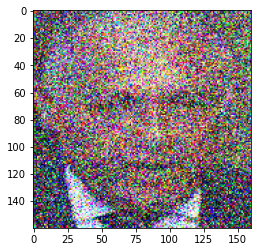

In [12]:
import os
df_imgdir = glob('/media/data1/donggeun/FF_original/FaceForensics++/FaceSwap/test/real/*/')
fake_img_dir = '/media/data1/donggeun/FF_original/FaceForensics++/FaceSwap/test/real/'

for idx, folder in enumerate(df_imgdir):
    
    # extract the last part of the folder for joining path
    imgfolder = folder.split('/')[-2]
    if not os.path.exists('/home/data/deepfake_privacy/ff_priv/FaceSwap/pixel/test/real/{0}'.format(imgfolder)):
        os.makedirs(os.path.join('/home/data/deepfake_privacy/ff_priv/FaceSwap/pixel/test/fake/', imgfolder))
    subfolder = os.path.join('/home/data/deepfake_privacy/ff_priv/FaceSwap/pixel/test/fake/', imgfolder)
    
    # subfolder = location of saved area
    # globfolder = location of train data
    globfolder = fake_img_dir + imgfolder + '/*'
    
    print(globfolder, 'glob folder')
#     print(subfolder)
    # generating pixelation image per every image of each subfolder
    for idx2, img in enumerate(glob(globfolder)):
        image = Image.open(img)
        a = pillow_to_numpy(image)
        dpimg = dp_pixelate_images_singleimg(a, target_h, target_w, m, eps)
    
        dpimg = dpimg.astype('uint8')
    
        plt.imshow(dpimg)
        cv2.imwrite(subfolder+'/folder_{0}_train_pixelate{1}.jpg'.format(idx, idx2),cv2.cvtColor(dpimg, cv2.COLOR_RGB2BGR))
        if idx2 == 10:
            print(subfolder, 'sub folder')
            
print('######finished pixelation!!##########')

##############################################################################################################################

### pixelation for validation dataset

/media/data1/donggeun/FF_original/FaceForensics++/DeepFake/val/fake/781_806/* glob folder
/home/data/privacy/pixel/val/fake/781_806 sub folder
/media/data1/donggeun/FF_original/FaceForensics++/DeepFake/val/fake/805_011/* glob folder
/home/data/privacy/pixel/val/fake/805_011 sub folder
/media/data1/donggeun/FF_original/FaceForensics++/DeepFake/val/fake/804_738/* glob folder
/home/data/privacy/pixel/val/fake/804_738 sub folder
/media/data1/donggeun/FF_original/FaceForensics++/DeepFake/val/fake/809_799/* glob folder
/home/data/privacy/pixel/val/fake/809_799 sub folder
/media/data1/donggeun/FF_original/FaceForensics++/DeepFake/val/fake/838_810/* glob folder
/home/data/privacy/pixel/val/fake/838_810 sub folder
/media/data1/donggeun/FF_original/FaceForensics++/DeepFake/val/fake/869_780/* glob folder
/home/data/privacy/pixel/val/fake/869_780 sub folder
/media/data1/donggeun/FF_original/FaceForensics++/DeepFake/val/fake/776_676/* glob folder
/home/data/privacy/pixel/val/fake/776_676 sub folder

/home/data/privacy/pixel/val/fake/873_872 sub folder
/media/data1/donggeun/FF_original/FaceForensics++/DeepFake/val/fake/786_819/* glob folder
/home/data/privacy/pixel/val/fake/786_819 sub folder
/media/data1/donggeun/FF_original/FaceForensics++/DeepFake/val/fake/823_584/* glob folder
/home/data/privacy/pixel/val/fake/823_584 sub folder
/media/data1/donggeun/FF_original/FaceForensics++/DeepFake/val/fake/793_768/* glob folder
/home/data/privacy/pixel/val/fake/793_768 sub folder
/media/data1/donggeun/FF_original/FaceForensics++/DeepFake/val/fake/764_850/* glob folder
/home/data/privacy/pixel/val/fake/764_850 sub folder
/media/data1/donggeun/FF_original/FaceForensics++/DeepFake/val/fake/860_905/* glob folder
/home/data/privacy/pixel/val/fake/860_905 sub folder
/media/data1/donggeun/FF_original/FaceForensics++/DeepFake/val/fake/854_747/* glob folder
/home/data/privacy/pixel/val/fake/854_747 sub folder
/media/data1/donggeun/FF_original/FaceForensics++/DeepFake/val/fake/816_649/* glob folder

/media/data1/donggeun/FF_original/FaceForensics++/DeepFake/val/fake/821_812/* glob folder
/home/data/privacy/pixel/val/fake/821_812 sub folder
/media/data1/donggeun/FF_original/FaceForensics++/DeepFake/val/fake/866_878/* glob folder
/home/data/privacy/pixel/val/fake/866_878 sub folder
/media/data1/donggeun/FF_original/FaceForensics++/DeepFake/val/fake/834_852/* glob folder
/home/data/privacy/pixel/val/fake/834_852 sub folder
/media/data1/donggeun/FF_original/FaceForensics++/DeepFake/val/fake/872_873/* glob folder
/home/data/privacy/pixel/val/fake/872_873 sub folder
/media/data1/donggeun/FF_original/FaceForensics++/DeepFake/val/fake/802_885/* glob folder
/home/data/privacy/pixel/val/fake/802_885 sub folder
/media/data1/donggeun/FF_original/FaceForensics++/DeepFake/val/fake/825_074/* glob folder
/home/data/privacy/pixel/val/fake/825_074 sub folder
/media/data1/donggeun/FF_original/FaceForensics++/DeepFake/val/fake/762_832/* glob folder
/home/data/privacy/pixel/val/fake/762_832 sub folder

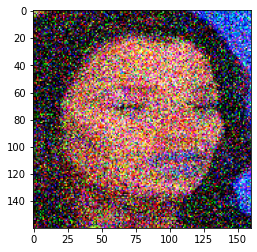

In [29]:
import os
df_imgdir = glob('/media/data1/donggeun/FF_original/FaceForensics++/DeepFake/val/fake/*/')
fake_img_dir = '/media/data1/donggeun/FF_original/FaceForensics++/DeepFake/val/fake/'

for idx, folder in enumerate(df_imgdir):
    
    # extract the last part of the folder for joining path
    imgfolder = folder.split('/')[-2]
    if not os.path.exists('/home/data/privacy/pixel/val/fake/{0}'.format(imgfolder)):
        os.makedirs(os.path.join('/home/data/privacy/pixel/val/fake/', imgfolder))
    subfolder = os.path.join('/home/data/privacy/pixel/val/fake/', imgfolder)
    
    # subfolder = location of saved area
    # globfolder = location of train data
    globfolder = fake_img_dir + imgfolder + '/*'
    
    print(globfolder, 'glob folder')
#     print(subfolder)
    # generating pixelation image per every image of each subfolder
    for idx2, img in enumerate(glob(globfolder)):
        image = Image.open(img)
        a = pillow_to_numpy(image)
        dpimg = dp_pixelate_images_singleimg(a, target_h, target_w, m, eps)
    
        dpimg = dpimg.astype('uint8')
    
        plt.imshow(dpimg)
        cv2.imwrite(subfolder+'/folder_{0}_fake_val_pixelate{1}.jpg'.format(idx, idx2),cv2.cvtColor(dpimg, cv2.COLOR_RGB2BGR))
        if idx2 == 10:
            print(subfolder, 'sub folder')
            
print('######finished pixelation!!##########')

##############################################################################################################################

In [ ]:
from glob import glob

df_imgdir = glob('/media/data1/donggeun/FF_original/FaceForensics++/DeepFake/train/fake/*/')

for idx, img in enumerate(df_imgdir):
    
    image = Image.open(img)
    a = pillow_to_numpy(image)
    dpimg = dp_pixelate_images_singleimg(a, target_h, target_w, m, eps)
    
    dpimg = dpimg.astype('uint8')
    
    plt.imshow(dpimg)
    cv2.imwrite('/home/data/privacy/pixel/fake/df_pixelate_{}.jpg'.format(idx),cv2.cvtColor(dpimg, cv2.COLOR_RGB2BGR))
#     im = dpimg.save('df_pixelate{}.jpg'.format(idx))
#     if idx == 300:
#         break
    

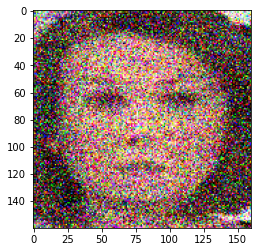

In [82]:
from glob import glob

df_imgdir = glob('/media/data1/donggeun/FF_original/FaceForensics++/DeepFake/train/fake/*/*')

for idx, img in enumerate(df_imgdir):
    image = Image.open(img)
    a = pillow_to_numpy(image)
    dpimg = dp_pixelate_images_singleimg(a, target_h, target_w, m, eps)
    
    dpimg = dpimg.astype('uint8')
    
    plt.imshow(dpimg)
    cv2.imwrite('/home/data/privacy/pixel/fake/df_pixelate_{}.jpg'.format(idx),cv2.cvtColor(dpimg, cv2.COLOR_RGB2BGR))
#     im = dpimg.save('df_pixelate{}.jpg'.format(idx))
#     if idx == 300:
#         break
    
    

### Apply differential privacy pixelate to deepfake test real images

- target_h & w = 160 x 160
- m = 10 , eps = 100

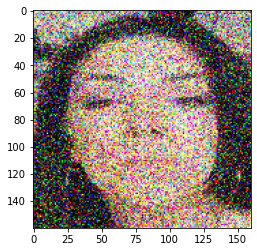

In [83]:
from glob import glob

df_imgdir = glob('/media/data1/donggeun/FF_original/FaceForensics++/DeepFake/test/real/*/*')

for idx, img in enumerate(df_imgdir):
    image = Image.open(img)
    a = pillow_to_numpy(image)
    dpimg = dp_pixelate_images_singleimg(a, target_h, target_w, m, eps)
    
    dpimg = dpimg.astype('uint8')
    
    plt.imshow(dpimg)
    cv2.imwrite('./df_pixelate/real/df_real_pixelate_{}.jpg'.format(idx),cv2.cvtColor(dpimg, cv2.COLOR_RGB2BGR))

### Apply DP method (pixelate) to facemask images (fake & real)

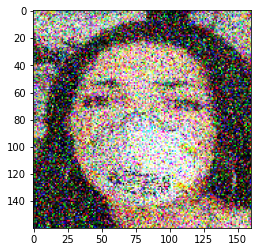

In [15]:
from glob import glob

fake_mask_dir = glob('/media/data1/donggeun/masked_test/FaceForensics++/DeepFake/fake/*/*')
real_mask_dir = glob('/media/data1/donggeun/masked_test/FaceForensics++/DeepFake/real/*/*')

for idx, img in enumerate(fake_mask_dir):
    image = Image.open(img)
    fake_mask = pillow_to_numpy(image)
    dpimg = dp_pixelate_images_singleimg(fake_mask, target_h, target_w, m, eps)
    
    dpimg = dpimg.astype('uint8')
    
    plt.imshow(dpimg)
    cv2.imwrite('./df_pixelated/df_mask_pixelate/fake/df_mask_fake_pixelate_{}.jpg'.format(idx),cv2.cvtColor(dpimg, cv2.COLOR_RGB2BGR))

print('Done saving fake mask pixelated images')
    
for idx, img in enumerate(real_mask_dir):
    image = Image.open(img)
    real_mask = pillow_to_numpy(image)
    dpimg = dp_pixelate_images_singleimg(real_mask, target_h, target_w, m, eps)
    
    dpimg = dpimg.astype('uint8')
    
    plt.imshow(dpimg)
    cv2.imwrite('./df_pixelated/df_mask_pixelate/real/df_mask_real_pixelate_{}.jpg'.format(idx),cv2.cvtColor(dpimg, cv2.COLOR_RGB2BGR))
    
print('Done saving real mask pixelated images')


In [ ]:
from glob import glob

df_imgdir = glob('/media/data1/donggeun/FF_original/FaceForensics++/DeepFake/test/real/*/*')

for idx, img in enumerate(df_imgdir):
    image = Image.open(img)
    a = pillow_to_numpy(image)
    dpimg = dp_pixelate_images_singleimg(a, target_h, target_w, m, eps)
    
    dpimg = dpimg.astype('uint8')
    
    plt.imshow(dpimg)
    cv2.imwrite('./df_pixelate/real/df_real_pixelate_{}.jpg'.format(idx),cv2.cvtColor(dpimg, cv2.COLOR_RGB2BGR))